In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import datetime

In [2]:
%load_ext nb_black
%matplotlib inline

<IPython.core.display.Javascript object>

In [23]:
def prop_counts(ser: pd.Series):
    vc = ser.value_counts()
    res = vc / vc.sum()
    return (res * 100).apply(lambda x: str(int(np.round(x, 0))) + "%")

<IPython.core.display.Javascript object>

In [3]:
df_personas = catalog.load("df_personas")

[08/16/22 00:01:50] INFO     Loading data from 'df_personas' (ParquetDataSet)...                ]8;id=606998;file:///opt/homebrew/Caskroom/miniforge/base/envs/dm_project/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=656318;file:///opt/homebrew/Caskroom/miniforge/base/envs/dm_project/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

<IPython.core.display.Javascript object>

In [8]:
today = datetime.date.today()

<IPython.core.display.Javascript object>

In [6]:
df_personas["prop_ent"] = 1 / df_personas["nombre_entidad"]
df_personas["prop_ciudad"] = 1 / df_personas["ciudad"]
df_personas["log_valor_del_contrato_mean"] = df_personas["valor_del_contrato"].apply(
    np.log
)

<IPython.core.display.Javascript object>

In [9]:
df_personas["days_since_first_contract"] = (
    today - df_personas["fecha_de_inicio_del_contrato"]
).apply(lambda x: x.days)

<IPython.core.display.Javascript object>

In [11]:
df_personas["days_since_first_by_count"] = df_personas["days_since_first_contract"]/df_personas["index"]


<IPython.core.display.Javascript object>

In [12]:
df_personas.drop(
    [
        "nombre_entidad",
        "ciudad",
        "valor_del_contrato",
        "fecha_de_inicio_del_contrato",
    ],
    axis=1,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [13]:
df_personas.columns

Index(['documento_proveedor', 'index', 'dias_adicionados', 'date_duration',
       'pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7',
       'pca_8', 'pca_9', 'proveedor_adjudicado', 'prop_ent', 'prop_ciudad',
       'log_valor_del_contrato_mean', 'days_since_first_contract',
       'days_since_first_by_count'],
      dtype='object')

<IPython.core.display.Javascript object>

In [15]:
ss = StandardScaler()

<IPython.core.display.Javascript object>

In [17]:
df_personas["cluster"] = DBSCAN(eps=2, min_samples=5).fit_predict(
    ss.fit_transform(
        df_personas.drop(["documento_proveedor", "proveedor_adjudicado"], axis=1).values
    )
)

<IPython.core.display.Javascript object>

In [40]:
len(df_personas)

514628

<IPython.core.display.Javascript object>

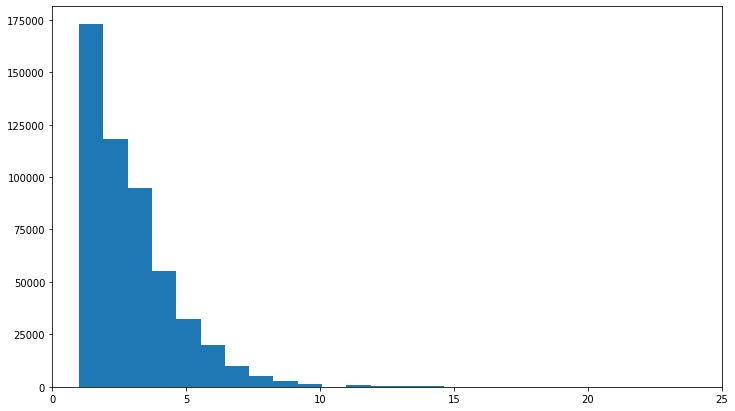

<IPython.core.display.Javascript object>

In [20]:
fig, ax = plt.subplots()
ax.hist(df_personas["index"], bins=240)
ax.set_xlim(0, 25)
fig.set_size_inches(12, 7)

In [24]:
prop_counts(df_personas["date_duration"]).head(5)  # .value_counts()

1    89%
2    10%
3     1%
4     0%
5     0%
Name: date_duration, dtype: object

<IPython.core.display.Javascript object>

In [26]:
pca = PCA(n_components=2)
df_personas[["x_pca", "y_pca"]] = pca.fit_transform(
    df_personas.drop(
        ["cluster", "documento_proveedor", "proveedor_adjudicado"], axis=1
    ).values
)

<IPython.core.display.Javascript object>

In [35]:
p1 = [x for x in df_personas["cluster"].unique() if x != -1]
p2 = np.random.permutation(p1)

<IPython.core.display.Javascript object>

In [38]:
df_personas["cluster_2"] = df_personas["cluster"].map(
    {-1: -1, **{p1[i]: p2[i] for i in range(len(p1))}}
)

<IPython.core.display.Javascript object>

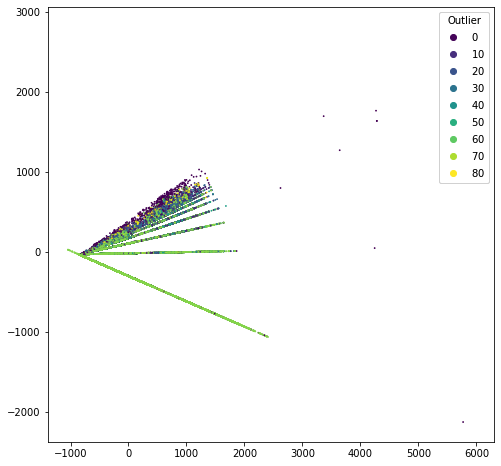

<IPython.core.display.Javascript object>

In [39]:
fig, ax = plt.subplots()
scat = ax.scatter(
    df_personas["x_pca"], df_personas["y_pca"], c=df_personas["cluster_2"], s=0.6
)
legend = ax.legend(*scat.legend_elements(), loc="upper right", title="Outlier")
ax.add_artist(legend)
fig.set_size_inches(8, 8)

In [153]:
catalog.save(
    "df_clusters_contractors",
    df_personas[
        [
            "documento_proveedor",
            "proveedor_adjudicado",
            "index_count",
            "date_duration_max_open_contracts",
            "log_valor_del_contrato_mean",
            "cluster",
            "x_pca",
            "y_pca",
        ]
    ],
)

[08/15/22 01:33:51] INFO     Saving data to 'df_clusters_contractors' (ParquetDataSet)...       ]8;id=938305;file:///opt/homebrew/Caskroom/miniforge/base/envs/dm_project/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=674438;file:///opt/homebrew/Caskroom/miniforge/base/envs/dm_project/lib/python3.10/site-packages/kedro/io/data_catalog.py#382\382]8;;\

<IPython.core.display.Javascript object>

In [141]:
df_personas[df_personas["cluster"] == -1].sort_values(
    "index_count", ascending=False
).head(20)

,documento_proveedor,index_count,dias_adicionados_mean,date_duration_max_open_contracts,pca_0_mean,pca_1_mean,pca_2_mean,pca_3_mean,pca_4_mean,pca_5_mean,...,pca_7_mean,pca_8_mean,pca_9_mean,prop_ent,prop_ciudad,log_valor_del_contrato_mean,days_since_first_contract,days_since_first_by_count,cluster,proveedor_adjudicado
267696,98475036,219,0.821918,43,-0.046546,-0.423400,1.673372,0.161327,0.023734,-1.772883,...,6.599925,0.088057,1.518557,0.009009,0.009009,17.431565,1713,7.821918,-1,dota hogar colchones
177252,59706955,204,3.313725,38,0.267381,-1.404240,2.530553,-0.176100,1.314510,-1.869544,...,5.805570,-0.511711,1.126793,0.017857,0.017857,18.600418,1410,6.911765,-1,deicy bravo jojoa
63581,23622025,172,0.715116,18,-0.493721,0.263277,1.794113,0.904088,-0.357872,-1.232693,...,6.812876,0.334897,1.568188,0.017857,0.017857,14.769836,1564,9.093023,-1,maria araceli leiva perilla
47807,17068260,169,19.751479,48,6.367724,0.845085,0.556430,-0.773149,0.024033,-0.980142,...,1.859662,1.404825,-0.619994,0.125000,0.125000,19.844395,1593,9.426036,-1,rafael antonio salamanca
249287,86075963,163,0.797546,14,0.025769,-0.927657,0.452002,-0.899477,0.531622,-1.859707,...,7.686668,-0.189100,1.969521,0.142857,0.142857,15.965232,1662,10.196319,-1,carlos ernesto rey aguilera
237219,80222117,148,3.918919,30,0.534181,-0.481944,0.695768,-0.472104,-0.304566,-1.419020,...,4.515492,0.870081,0.933605,0.008696,0.008696,18.409268,1718,11.608108,-1,miguel angel vallejo burgos
453904,1102720365,147,4.414966,12,0.244779,-0.500521,1.122730,0.347915,-0.206281,-1.408963,...,5.840912,0.292502,1.505907,0.009615,0.009615,16.925518,2330,15.850340,-1,mosthye vicente medina rodriguez - world m&d ...
302261,1016018644,129,4.426357,22,0.366106,-0.754169,1.025366,-0.297631,-1.031642,-2.586797,...,6.631485,0.512133,1.906689,0.014925,0.014925,16.281054,1624,12.589147,-1,bioemedic ingenieria biomedica
255383,91282210,127,3.165354,37,-1.366431,1.697657,3.907712,3.536135,-1.122033,-0.306703,...,7.284369,1.722037,2.257033,0.027027,0.027027,18.039303,1784,14.047244,-1,jairo osorio caballero
270827,830004892,122,9.508197,25,2.950823,-0.162726,0.430119,-0.652987,-0.344847,-1.182113,...,3.341962,0.820963,0.444149,0.043478,0.043478,19.483858,1712,14.032787,-1,tecnica electromedica s.a.


<IPython.core.display.Javascript object>